# EXPLORATORY DATA ANALYSIS - RETAIL

### BY NAVYA JAIN

## TABLE OF CONTENTS

* [Importing libraries](#import)
* [Introduction](#intro)
* [Data](#data)
* [Understanding the Data](#und)
* [Performing EDA](#eda)
* [Results and discussions](#res)
* [Conclusion](#conc)

## IMPORTING LIBRARIES <a name="import"></a>

In [1]:
#To load the data into a datframe
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# INTRODUCTION <a name="intro"></a>

The task is to work on a retail dataset provided by a client in order to find weak areas in the business and suggest improvements based on data. Business problems have to be found.

# DATA <a name="data"></a>

The first step is to load the data into a pandas dataframe.

## Reading the data

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

## Displaying the data

In [3]:
#Displaying the first 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Displaying the last 5 rows
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
#Displaying the size of the dataframe in (row, column) format
print("The size of the dataframe is", df.shape)

The size of the dataframe is (9994, 13)


# UNDERSTANDING THE DATA <a name="und"></a>

## DROPPING DUPLICATE VALUES

From the above description and summarizing, it is clear that no values are missing, they are consistent and have the correct datatype. In order to confirm that nothing is repeated, duplicate values will be dropped.

In [6]:
df.drop_duplicates(inplace = True)
df.shape

(9977, 13)

## DESCRIBING THE DATA

Using the describe function to return statistical properties of the data in order to look for missing values or understanding what part of the data does not make sense by noticing the deviations.

In [7]:
df.describe(include = "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200


## SUMMARIZING

In order to understand the data better, it becomes imperative to summarize it. This summary includes the column name, the non-null count and the data type of the column.

This step is done to make logical changes. For example, postal code should be of int64 type due to logical reasons, and if it is of object type, it will be typecasted.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


## DROPPING 'POSTAL CODES'

The data does not vary as postal codes varry, i.e., data changes irrespective of the postal code and will only tamper the results if not dropped because postal codes change no matter what irrespective of other attributes.

In [9]:
df = df.drop(['Postal Code'],axis = 1)

## CORRELATION AND COVARIANCE

In [10]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [11]:
df.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


# PERFORMING EDA <a name="eda"></a>

## SHIP MODE

The first column in the CSV file is that of ship mode. Let us first find out the frequencies of the shipping modes used.

In [12]:
ship_mode = pd.DataFrame(df.groupby("Ship Mode")["Profit"].sum() )
ship_mode.columns = ['Profit']
ship_mode['Count'] = df['Ship Mode'].value_counts()
ship_mode['Profit per piece'] = ship_mode['Profit']/ship_mode['Count']
ship_mode['Ship Mode'] = ['First Class', 'Same Day', 'Second Class', 'Standard Class']
ship_mode

,Profit,Count,Profit per piece,Ship Mode
Ship Mode,,,,
First Class,48953.6561,1537,31.850134,First Class
Same Day,15871.8869,542,29.283924,Same Day
Second Class,57446.6516,1943,29.565956,Second Class
Standard Class,163969.2280,5955,27.534715,Standard Class


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

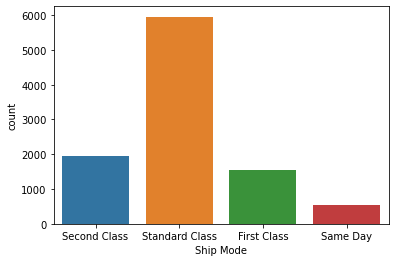

In [13]:
sns.countplot(x=df['Ship Mode'])

#### NOTE 1

'Standard Class' shipment type has the highest number of deliveries.

'Same Day' shipment mode has the lowest number of deliveries.

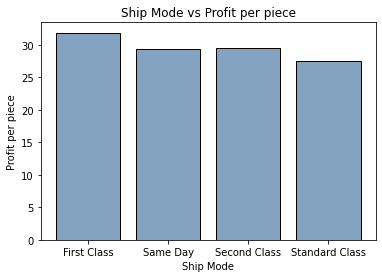

In [14]:
plt.bar('Ship Mode','Profit per piece', data=ship_mode, color=(0.2, 0.4, 0.6, 0.6), edgecolor='black')
plt.title('Ship Mode vs Profit per piece')
plt.xlabel('Ship Mode')
plt.ylabel('Profit per piece')
plt.show()

#### NOTE 2

'Standard Class' has least profit on individial pieces. First class has the most profit on individual pieces.

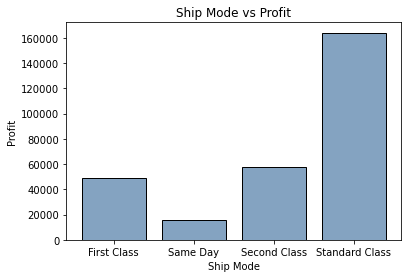

In [15]:
plt.bar('Ship Mode','Profit', data=ship_mode, color=(0.2, 0.4, 0.6, 0.6), edgecolor='black')
plt.title('Ship Mode vs Profit')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.show()

### Note 3

The most revenue is generated from 'Standard Class'.

## SEGMENT

### Pairplot

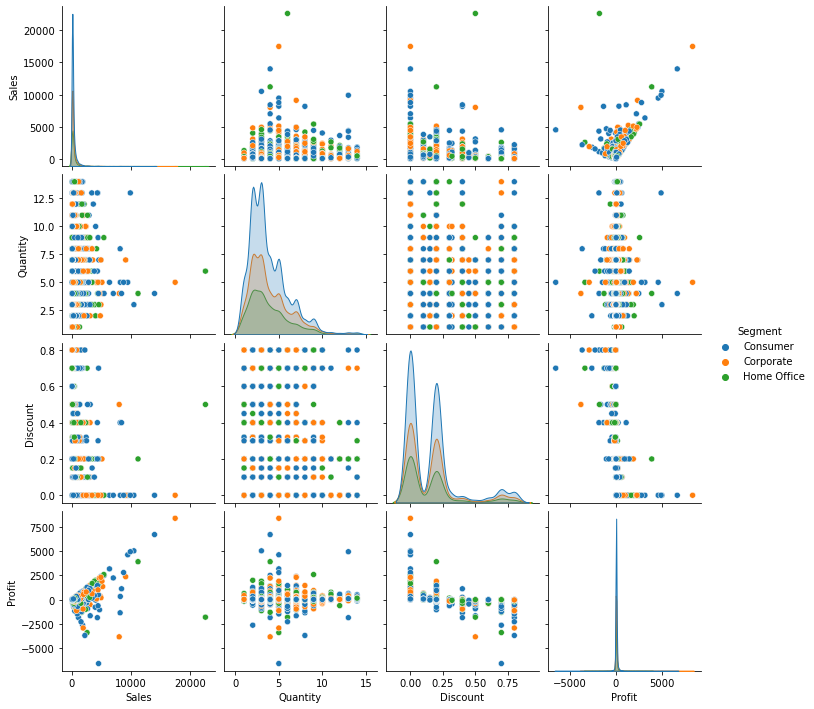

In [16]:
sns.pairplot(df,hue = 'Segment')

In [17]:
segment_profit = pd.DataFrame(df.groupby("Segment")["Profit"].sum() )
segment_profit.columns = ['Profit']
segment_profit['Segment'] = df.Segment.unique()
segment_profit['Count'] = df['Segment'].value_counts()
segment_profit['Profit per piece'] = segment_profit['Profit']/segment_profit['Count']
segment_profit

,Profit,Segment,Count,Profit per piece
Segment,,,,
Consumer,134007.4413,Consumer,5183,25.855188
Corporate,91954.9798,Corporate,3015,30.499164
Home Office,60279.0015,Home Office,1779,33.883643


<AxesSubplot:xlabel='Segment', ylabel='count'>

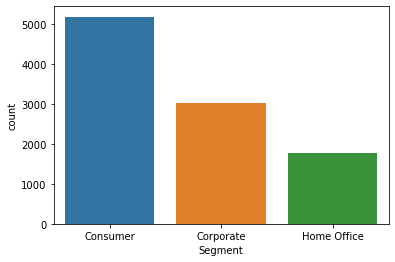

In [18]:
sns.countplot(x = 'Segment',data = df, palette = 'tab10')

### Note 4

Consumer segment has the most number of entries hence the most purchases.

Home office has the least number of entries.

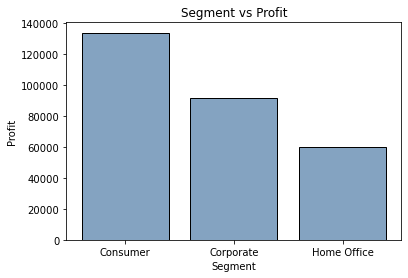

In [19]:
plt.bar('Segment','Profit', data=segment_profit, color=(0.2, 0.4, 0.6, 0.6), edgecolor='black')
plt.title('Segment vs Profit')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

### Note 5

Comsumer segment gets the most profit.

Home office gets the least profit.

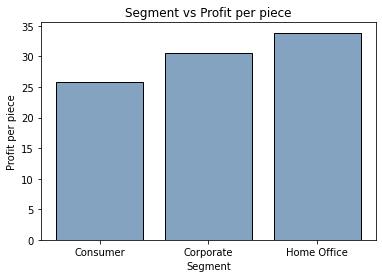

In [20]:
plt.bar('Segment','Profit per piece', data=segment_profit, color=(0.2, 0.4, 0.6, 0.6), edgecolor='black')
plt.title('Segment vs Profit per piece')
plt.xlabel('Segment')
plt.ylabel('Profit per piece')
plt.show()

### Note 6

Home office gets the most profit per piece.
Consumer gets the least profit per piece.

## STATES

In [21]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

### STATE-WISE DISTRIBUTION OF SALES

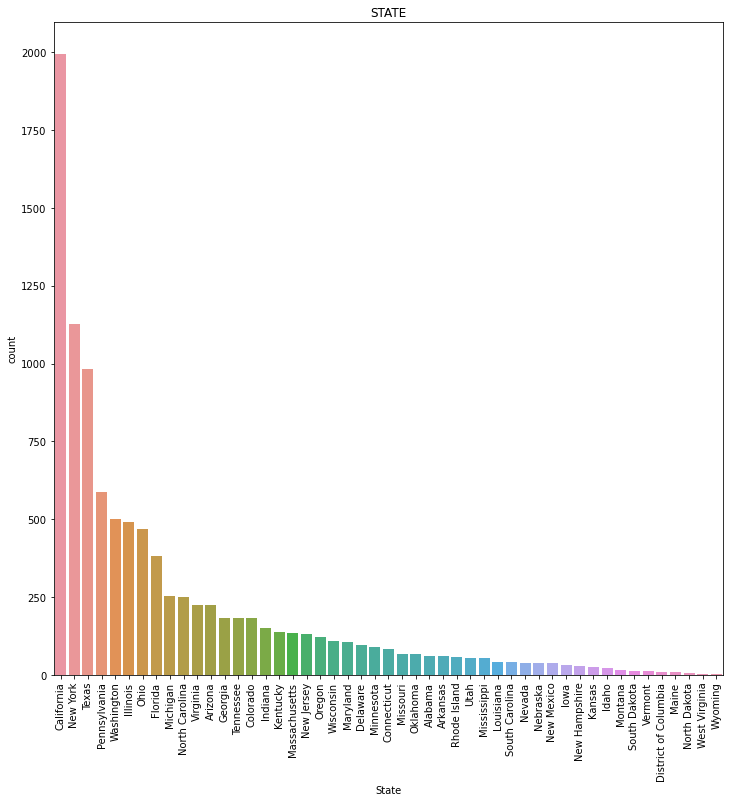

In [22]:
plt.figure(figsize = (12,12))
sns.countplot(x = df["State"],
             order = df["State"].value_counts().index )

plt.xticks(rotation = 90)
plt.title("STATE")
plt.show()

### NOTE 7

California has the most customers, while Wyoming has the least customers.

## REGION

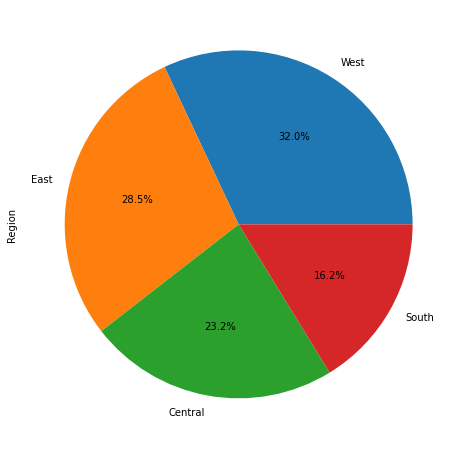

In [23]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

### Note 8

- West region has 32% customers.
- East region has 28.5% customers.
- Central region has 23.2% customers.
- South region has 16.2% customers.

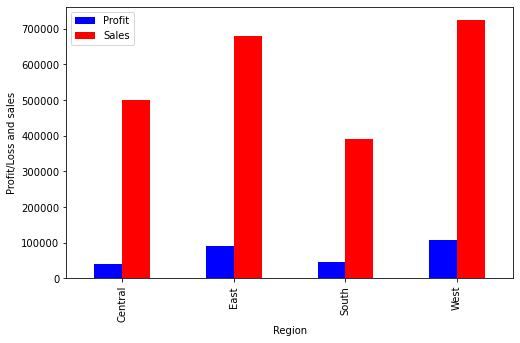

In [24]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Note 9

- West and East has higher profit than Central and South.

## SEGMENT WISE SALE IN EVERY REGION

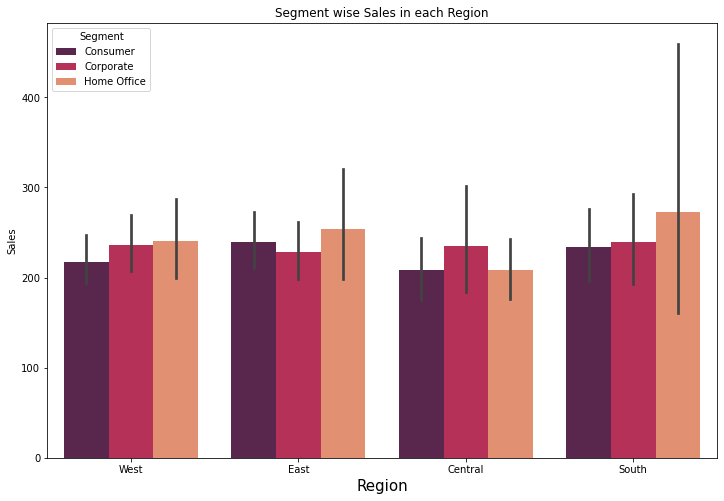

In [25]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

### NOTE

Segment wise sales are almost same in every region

## CATEGORY

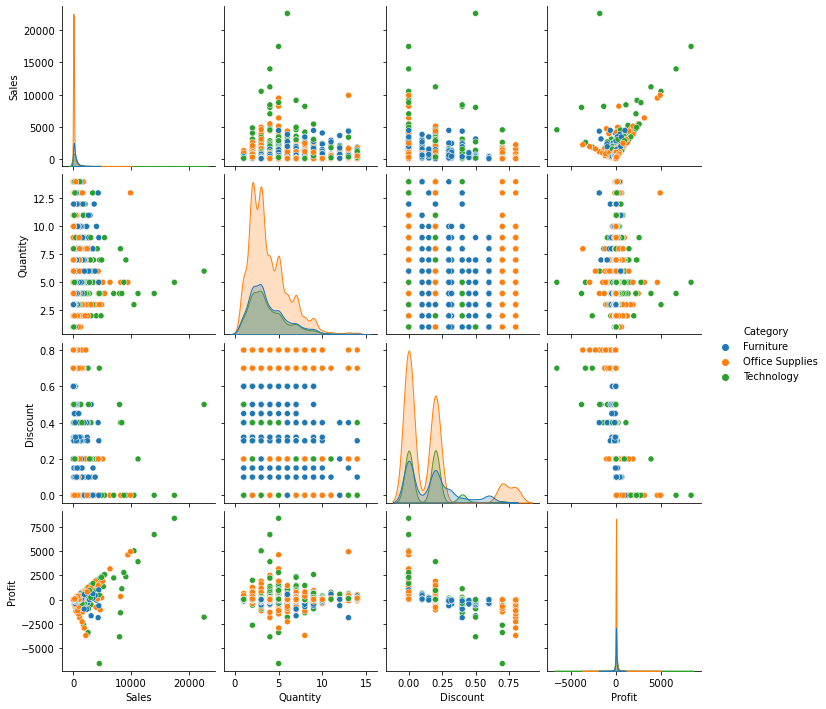

In [26]:
sns.pairplot(df,hue='Category')

### PROFIT BASED ON CATEGORY

In [27]:
tc = pd.DataFrame(df.groupby("Category")["Profit"].sum() )
tc

,Profit
Category,
Furniture,18421.8137
Office Supplies,122364.6608
Technology,145454.9481


### Note

Office supplies have the highest profit. Furniturre has the lowest profit.

## SUB-CATEGORY

### Pair plot

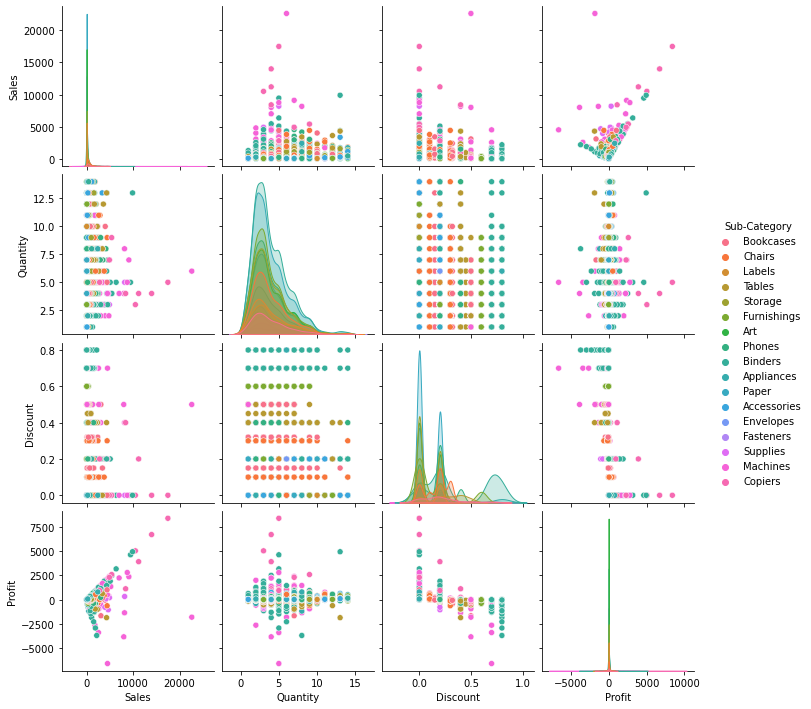

In [28]:
sns.pairplot(df,hue='Sub-Category')

In [29]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### Note

Binders sell the most, copiers sell the less.

### PROFIT BASED ON SUB CATEGORY

In [30]:
tsc = pd.DataFrame(df.groupby("Sub-Category")["Profit"].sum() )
tsc

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6524.6118
Binders,30228.0003
Bookcases,-3472.5560
Chairs,26567.1278
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


### Note

From the above table, we get negative values of profit for 3 sub-categories. These are taking losses.
The sub-categories that are taking losses are Bookcases, Supplies and Tables.

## State wise analysis of Discount

Text(0.5, 1.0, 'State wise analysis of Discount')

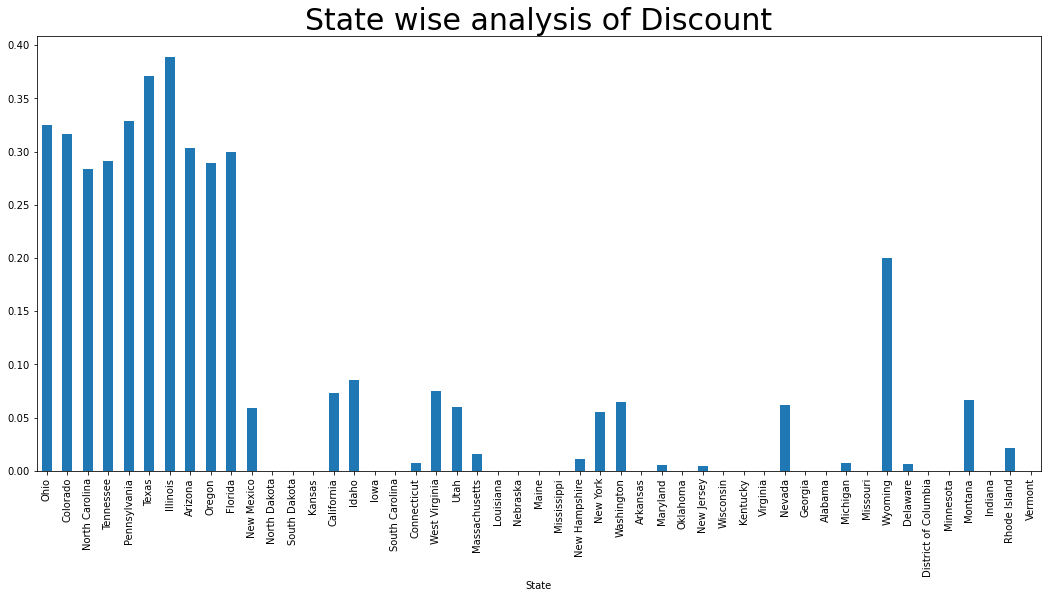

In [31]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state1=df_state.sort_values('Profit')
df_state1['Discount'].plot(kind='bar',figsize=(18,8))
plt.title('State wise analysis of Discount', fontsize=30)

### Note

Discount rates are highest in Illinois followed by Pennsylvania.

## SALES PER CATEGORY PER SEGMENT

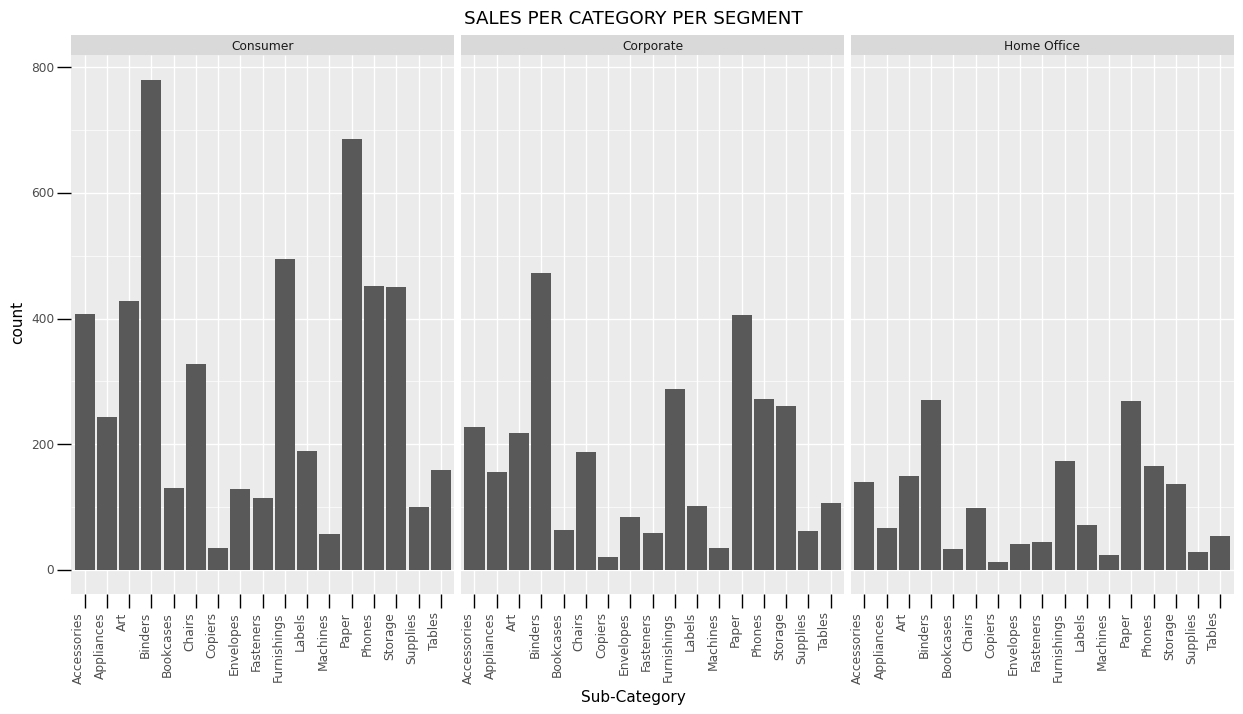

<ggplot: (110229625305)>

In [32]:
flip_xlabels = theme(axis_text_x = element_text( angle = 90, hjust =1),figure_size = (15,7), axis_ticks_length_major = 10, 
                    axis_ticks_length_minor = 5)

(ggplot( df, aes (x = "Sub-Category", fill = "Sales" )) + geom_bar() + facet_wrap(['Segment'])
 + flip_xlabels + ggtitle("SALES PER CATEGORY PER SEGMENT"))

### Note

Consumer type category has most sales. Blenders are sold the most.
Categories in home office are not sold as much as the other categories.

## SALE DENSITY VS PROFIT

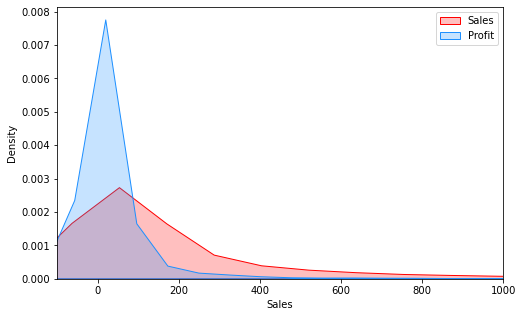

In [33]:
plt.figure(figsize = (8,5))

sns.kdeplot(df.Sales, color = 'red', label = 'Sales', shade = True)
sns.kdeplot(df.Profit, color = 'dodgerblue', label = 'Profit', shade = True)

plt.xlim([-100, 1000])
plt.legend()
plt.show()

## QUANITITY AND DISCOUNT

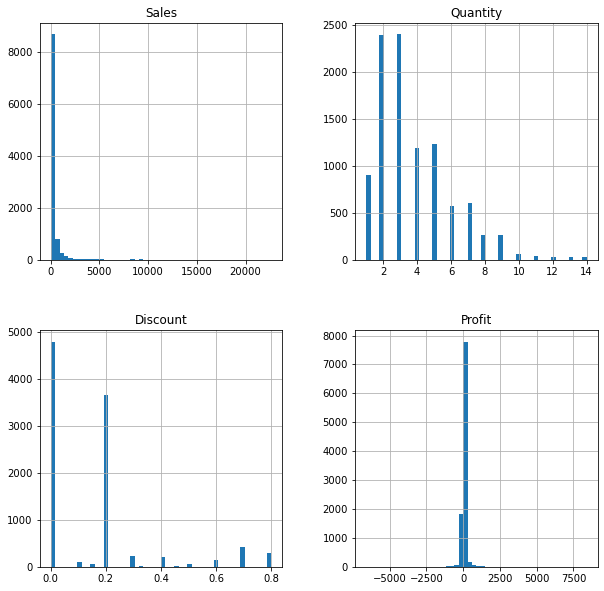

In [34]:
df.hist(figsize=(10,10),bins=50)
plt.show()

### Note

- Most customers tends to buy quantity of 2 and 3
- Discount give maximum is 0 to 20 percent

# RESULTS AND DISCUSSIONS

### SHIP MODE

- 'Standard Class' has highest number of entries. 'Same Day' has lowest number of entries.
- The most revenue is generated by 'Standard Class'. The lease revenue is generated by 'Same Day'.
- But, 'Standard Class' has least profit on individial pieces. Whereas 'First Class' has the most profit on individual pieces.

### SEGMENT
- Consumer segment has the most number of entries hence the most purchases. Home office has the least number of entries.
- Comsumer segment gets the most profit. Home office gets the least profit.
- Home office gets the most profit per piece. Consumer gets the least profit per piece.

### STATE
- California has the most customers, while Wyoming has the least number of customers.

### REGION
- West region has the most customers, while South region has the least customers.
- West and East has higher profit than South and North.

### SEGMENT WISE SALE IN EVERY REGION
- Segment wise sales are almost same in every region.

### CATEGORY
- Office supplies have the highest profit. Furniture has the lowest profit.

### SUB-CATEGORY
- Binders sell the most, copiers sell the less.
- The sub-categories that are taking losses are Bookcases, Supplies and Tables.

### STATE WISE ANALYSIS OF DISCOUNT
- Discount rates are highest in Illinois followed by Pennsylvania.

### SALES PER CATEGORY PER SEGMENT
- Consumer type category has most sales. Blenders are sold the most. 
- Sub-categories in home office are not sold as much as the other categories

# CONCLUSION

- 'First Class' ship mode should be increased as it has the most profit on individual pieces. 
- 'Same Day' ship mode is another weak area with room for improvement as it has the least number of deliveries.
- 'Home office' should be increased as it has the most profit on individual pieces and least deliveries.
- Wyoming has the least customers which can worked on.
- South region has the least customers and has room for improvement.
- The sub-categories that are taking losses are Bookcases, Supplies and Tables. These can either be worked upon or removed.
- Discount rates are highest in Illinois followed by Pennsylvania. These do not have the highest sales.